In [1]:
from array import array
import numpy as np
import math

In [2]:
# Initial Conditions
speed = 50.0
theta = 45.0
y1 = 2.0


# Other constants
grav = 9.81 # gravitional acceleration
Pi = math.pi

In [3]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(-grav)

In [4]:
tau = 0.2 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
time = array('d')

In [5]:
endtime = 0
nelements = 0
for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    t = (iStep-1)*tau
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    accel[0]=0.0
    accel[1]=-1.0*grav
    
    # Euler Method
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]    
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    
    # MidPoint Method
    vxnew = v[0] + tau*accel[0]
    vynew = v[1] + tau*accel[1]
    r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    r[1] = r[1] + tau*(v[1] + vynew)/2.0
    v[0] = vxnew
    v[1] = vynew    
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    time.append(tau*(iStep-1))
    
    if (r[1] < 0):
        xplot.append(r[0])
        yplot.append(r[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
max_y = np.amax(yplot)+1
max_x = np.amax(xplot)+1
max_t = np.amax(time)+1

print ("Maximum range is %f meters." % r[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % (max_t-1))
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

print ("Max y = %f" % (max_y-1))
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 261.629509 meters.
Theory maximum range is 254.841998 meters.
 
Time of flight is 7.400000 seconds.
Theory time of flight is 7.208020 seconds.
 
Max y = 65.710421
Theory Max y = 63.710499
 
Number of elements = 37


In [6]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle

xcanvas = 1000
ycanvas = 500

c1 = TCanvas( 'c1', 'XY Projectile', 0, 0, xcanvas, ycanvas )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

c2 = TCanvas( 'c2', 'XT Projectile', 0, 0, xcanvas, ycanvas )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

c3 = TCanvas( 'c3', 'YT Projectile', 0, 0, xcanvas, ycanvas )
c3.SetGridx()
c3.SetGridy()
c3.GetFrame().SetFillColor( 21 )
c3.GetFrame().SetBorderMode(-1 )
c3.GetFrame().SetBorderSize( 5 )

gr = TGraph(nelements,xplot,yplot)
grr = TGraph(nelements,xNoAir,yNoAir)

gxt = TGraph(nelements,time,xplot)
gxtt = TGraph(nelements,time,xNoAir)

gyt = TGraph(nelements,time,yplot)
gytt = TGraph(nelements,time,yNoAir)

Welcome to JupyROOT 6.16/00


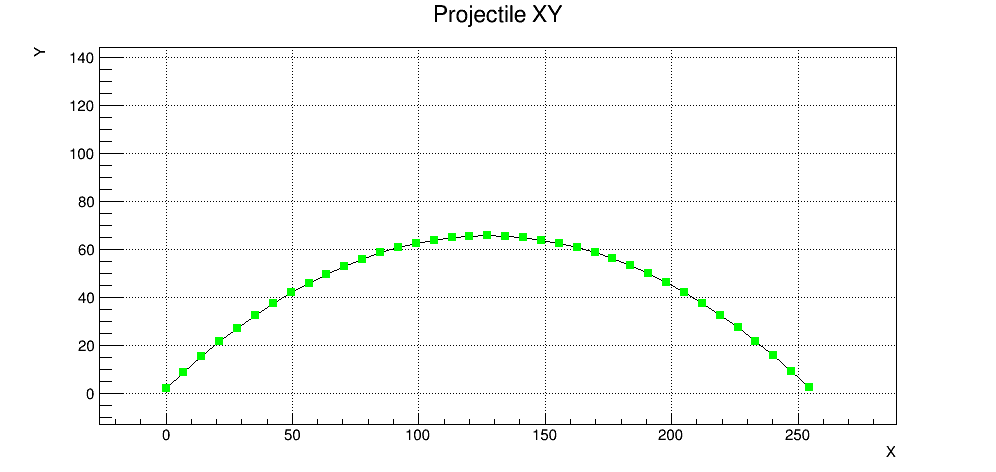

In [7]:
gr.SetMarkerColor(3)
grr.SetMarkerColor(2)
gr.SetMarkerStyle(21)
grr.SetMarkerStyle(22)
grr.SetTitle("Projectile XY")
grr.GetXaxis().SetTitle("X")
grr.GetYaxis().SetTitle("Y")
axis = grr.GetXaxis()
axis.SetLimits(-0.1*max_x,1.1*max_x)
grr.GetHistogram().SetMaximum(1.1*max_x*ycanvas/xcanvas)
grr.GetHistogram().SetMinimum(-0.1*max_x*ycanvas/xcanvas)

c1.cd()
grr.Draw("APL")
gr.Draw("P")
c1.Draw()

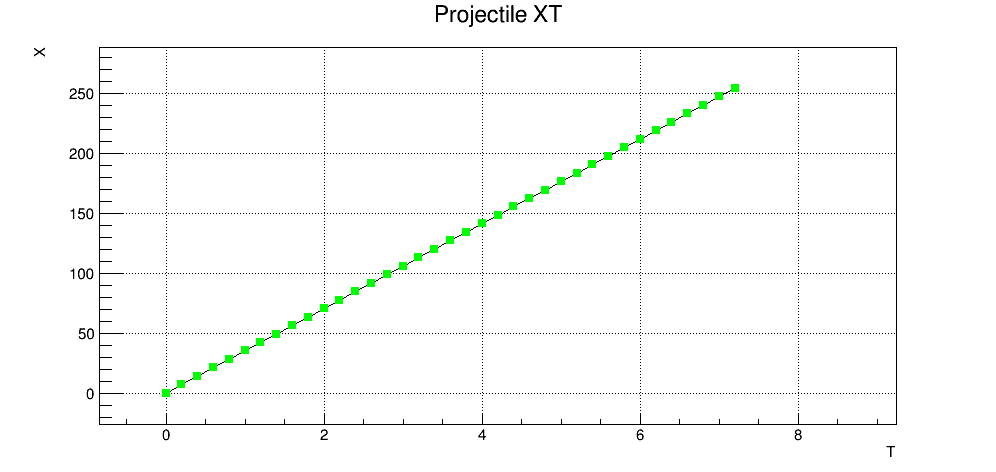

In [8]:
gxt.SetMarkerColor(3)
gxtt.SetMarkerColor(2)
gxt.SetMarkerStyle(21)
gxtt.SetMarkerStyle(22)
gxtt.SetTitle("Projectile XT")
gxtt.GetXaxis().SetTitle("T")
gxtt.GetYaxis().SetTitle("X")
axis = gxtt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gxtt.GetHistogram().SetMaximum(1.1*max_x)
gxtt.GetHistogram().SetMinimum(-0.1*max_x)

c2.cd()
gxtt.Draw("APL")
gxt.Draw("P")
c2.Draw()

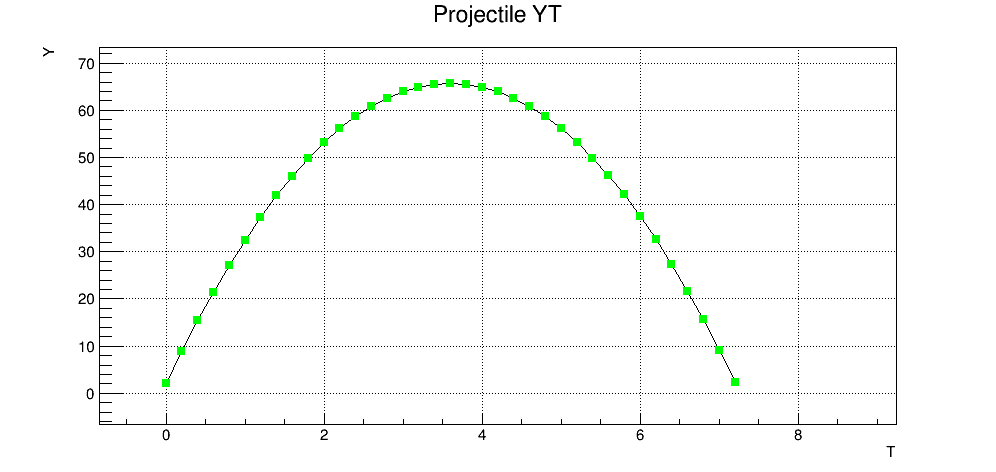

In [9]:
gyt.SetMarkerColor(3)
gytt.SetMarkerColor(2)
gyt.SetMarkerStyle(21)
gytt.SetMarkerStyle(22)
gytt.SetTitle("Projectile YT")
gytt.GetXaxis().SetTitle("T")
gytt.GetYaxis().SetTitle("Y")
axis = gytt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gytt.GetHistogram().SetMaximum(1.1*max_y)
gytt.GetHistogram().SetMinimum(-0.1*max_y)

c3.cd()
gytt.Draw("APL")
gyt.Draw("P")
c3.Draw()